In [1]:
import sys
sys.path.append( '../utilities' )
from data_engine import DataEngine
from backtesting import Backtesting
import pandas as pd
import ta
import ccxt
import json
f = open('../database/pair_list.json',)
pairJson = json.load(f)
f.close()

In [2]:
#pairList = pairJson['ftxBnbPair']
pairList = pairJson['ftxClassicPair']
# pairList = pairJson['ftxClassicPair']
timeframe = '1h'
startDate = '2017-01-01T00:00:00'

#dataEngine = DataEngine(session=ccxt.hitbtc())
dataEngine = DataEngine(session=ccxt.ftx())

dfList = []
for pair in pairList:
    df = dataEngine.get_historical_from_db(pair, timeframe, startDate)
    dfList.append(df)

print("Data load 100%")
dfList[0]

Successfully load 9982 candles for BTCUSD
Successfully load 9982 candles for ETHUSD
Successfully load 9982 candles for BNBUSD
Successfully load 9982 candles for LTCUSD
Successfully load 8946 candles for DOGEUSD
Successfully load 9982 candles for XRPUSD
Successfully load 9982 candles for SOLUSD
Successfully load 6129 candles for SHIBUSD
Successfully load 9982 candles for LINKUSD
Successfully load 9982 candles for UNIUSD
Successfully load 9982 candles for MATICUSD
Successfully load 6948 candles for AXSUSD
Successfully load 7260 candles for CROUSD
Successfully load 9982 candles for FTTUSD
Successfully load 9982 candles for TRXUSD
Successfully load 9982 candles for BCHUSD
Successfully load 7962 candles for FTMUSD
Successfully load 9546 candles for GRTUSD
Successfully load 9982 candles for AAVEUSD
Successfully load 9982 candles for OMGUSD
Successfully load 7573 candles for LRCUSD
Successfully load 9982 candles for SUSHIUSD
Successfully load 3108 candles for MANAUSD
Successfully load 9982 ca

,open,high,low,close,volume
timestamp,,,,,
2020-12-01 00:00:00,19703.0,19722.0,19491.5,19573.5,1.515860e+06
2020-12-01 01:00:00,19573.5,19638.0,19442.5,19611.5,1.207382e+06
2020-12-01 02:00:00,19611.5,19707.0,19557.5,19685.0,2.424738e+06
2020-12-01 03:00:00,19685.0,19686.0,19350.0,19410.0,1.876003e+06
2020-12-01 04:00:00,19410.0,19530.5,19365.0,19369.5,6.910967e+05
...,...,...,...,...,...
2022-01-20 17:00:00,43284.0,43315.0,42998.0,43033.0,1.340536e+07
2022-01-20 18:00:00,43033.0,43089.0,42826.0,42843.0,1.769752e+07
2022-01-20 19:00:00,42843.0,43272.0,42827.0,42931.0,2.576442e+07


In [3]:
# -- Indicator variable --
stochWindow = 14
willWindow = 14

# -- Drop all columns we do not need --
for df in dfList:
    # -- Drop all columns we do not need --
    df.drop(columns=df.columns.difference(['open','high','low','close','volume']), inplace=True)

    # -- Indicators, you can edit every value --    
    df['EMA1']=ta.trend.ema_indicator(close=df['close'], window=7)
    df['EMA2']=ta.trend.ema_indicator(close=df['close'], window=30)
    df['EMA3']=ta.trend.ema_indicator(close=df['close'], window=50)
    df['EMA4']=ta.trend.ema_indicator(close=df['close'], window=100)
    df['EMA5']=ta.trend.ema_indicator(close=df['close'], window=121)
    df['EMA6']=ta.trend.ema_indicator(close=df['close'], window=200)

    df['STOCH_RSI'] = ta.momentum.stochrsi(close=df['close'], window=stochWindow, smooth1=3, smooth2=3)
    df['WillR'] = ta.momentum.williams_r(high=df['high'], low=df['low'], close=df['close'], lbp=willWindow)

print("Indicators loaded 100%")
dfList[0]

Indicators loaded 100%


,open,high,low,close,volume,EMA1,EMA2,EMA3,EMA4,EMA5,EMA6,STOCH_RSI,WillR
timestamp,,,,,,,,,,,,,
2020-12-01 00:00:00,19703.0,19722.0,19491.5,19573.5,1.515860e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-01 01:00:00,19573.5,19638.0,19442.5,19611.5,1.207382e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-01 02:00:00,19611.5,19707.0,19557.5,19685.0,2.424738e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-01 03:00:00,19685.0,19686.0,19350.0,19410.0,1.876003e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-01 04:00:00,19410.0,19530.5,19365.0,19369.5,6.910967e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-20 17:00:00,43284.0,43315.0,42998.0,43033.0,1.340536e+07,42833.490574,42273.327520,42198.159948,42281.160026,42331.477311,42546.065385,0.658776,-27.630058
2022-01-20 18:00:00,43033.0,43089.0,42826.0,42843.0,1.769752e+07,42835.867930,42310.080583,42223.447793,42292.285570,42339.862928,42549.019958,0.454789,-38.612717
2022-01-20 19:00:00,42843.0,43272.0,42827.0,42931.0,2.576442e+07,42859.650948,42350.139900,42251.194939,42304.933380,42349.553700,42552.820754,0.483701,-34.339846


In [4]:
dfTestList = []
for df in dfList:
    dfTestList.append(df.loc['2021-01-01':])

# -- Starting value --
startingBalance = 1000
makerFee = 0
takerFee = 0.0007

# -- Rules --
StopLossActivation = False
takeProfitActivation = False
showLog = False

# -- Hyper parameters --
stochOverBought = 0.8
stochOverSold = 0.2
SlPct = 0.015
TpPct = 0.15
willOverSold = -85
willOverBought = -10
maxPositions = 5

# -- Trade Functions --

# -- Condition to BUY market --
def buyCondition(row, previousRow=None):
    if (
        row['EMA1'] > row['EMA2']
        and row['EMA2'] > row['EMA3']
        and row['EMA3'] > row['EMA4']
        and row['EMA4'] > row['EMA5']
        and row['EMA5'] > row['EMA6']
        #and (row['STOCH_RSI']<0.82 or row['WillR'] < willOverSold)
    ):
        return True
    else:
        return False

# -- Condition to SELL market --
def sellCondition(row, previousRow=None):
    if row['EMA2'] > row['EMA1'] and (row['STOCH_RSI']>0.2 or row['WillR'] > willOverBought):
        return True
    else:
        return False
            

# -- Value initialisation --
usd = startingBalance
wallet = startingBalance
stopLoss = [0] * len(pairList)
takeProfit = [5000000] * len(pairList)
walletCoinArray = [0] * len(pairList)
walletUsdArray = [0] * len(pairList)
activePositions = 0
lastIndex = dfTestList[0].index.values[1]

# -- Definition of dfTrades, that will be the dataset to do your trades analyses --
dfTrades = None
dfTrades = pd.DataFrame(columns=['date', 'symbol','position', 'reason',
                                 'price', 'frais', 'fiat', 'coins', 'wallet'])

# # -- Iteration on all your price dataset (df) --
for index, row in dfTestList[0].iterrows():
    # -- Check if you have one coin in your wallet --
    if (walletCoinArray.count(0) == len(walletCoinArray)) == False:
        # -- Iteration on all coin (upgrade possible: only check coin in your wallet) --
        for i in range(0,len(dfTestList)):
            # -- Check if you have more than 0 coin --
            if walletCoinArray[i] != 0:
                try:
                    actualRow = dfTestList[i].loc[index]
                    previousRow = dfTestList[i].loc[lastIndex]
                    # -- Stop Loss --
                    if sellCondition(actualRow,previousRow):
                        sellPrice = actualRow['close']
                        usd = usd + walletCoinArray[i] * sellPrice
                        fee = takerFee * walletCoinArray[i] * sellPrice
                        usd = usd - fee
                        # -- Set coin and equivalent usd to 0 after sold position --
                        walletCoinArray[i] = 0
                        walletUsdArray[i] = 0
                        activePositions -= 1

                        # -- LOG --
                        if showLog:
                            print("Sell", pairList[i],"at", sellPrice, '$ the', index)

                        # -- Add the trade to DfTrades to analyse it later --
                        myrow = {
                            'date': index,
                            'symbol': pairList[i],
                            'position': "Sell",
                            'reason': 'Sell Market Order',
                            'price': sellPrice,
                            'frais': fee,
                            'fiat': usd,
                            'coins': 0,
                            'wallet': sum(walletUsdArray) + usd
                        }
                        dfTrades = dfTrades.append(myrow, ignore_index=True)
                except:
                    pass
    # -- Buy market order --
    # -- Check if you can open a new position --
    if activePositions < maxPositions:
        # -- Check buy condition for each coin of list --
        for i in range(0,len(dfTestList)):
            try:
                actualRow = dfTestList[i].loc[index]
                previousRow = dfTestList[i].loc[lastIndex]
                # -- Buy condition --
                if buyCondition(actualRow, previousRow) and activePositions < maxPositions and walletCoinArray[i]==0 :
                    buyPrice = actualRow['close']
                    # -- Define size of the position --
                    usdMultiplier = 1/(maxPositions-activePositions)
                    fee = takerFee * usd * usdMultiplier
                    usd = usd - fee
                    coin = (usd * usdMultiplier) / buyPrice
                    usd = usd - (usd * usdMultiplier)
                    # -- Set coin and equivalent usd to size of position after open position --
                    walletCoinArray[i] = coin
                    walletUsdArray[i] = coin * actualRow['close']
                    activePositions += 1
                    # -- Create a Stop Loss --
                    if StopLossActivation:
                        stopLoss[i] = buyPrice - SlPct * buyPrice
                    # -- Create a Take Profit --
                    if takeProfitActivation:
                        takeProfit[i] = buyPrice + TpPct * buyPrice

                    # -- LOG --
                    if showLog:
                        print("Buy", pairList[i],"at", buyPrice, '$ the', index)

                    # -- Add the trade to dfTrades to analyse it later --
                    myrow = {
                        'date': index,
                        'symbol': pairList[i],
                        'position': "Buy",
                        'reason': 'Buy Market Order',
                        'price': buyPrice,
                        'frais': fee,
                        'fiat': usd,
                        'coins': coin,
                        'wallet': sum(walletUsdArray) + usd
                    }
                    dfTrades = dfTrades.append(myrow, ignore_index=True)
            except:
                pass

    # -- Keep last index to define last row --            
    lastIndex = index

print("Final wallet", sum(walletUsdArray) + usd)


Final wallet 260300.9763937393


In [5]:
BTobject = Backtesting()
newDf = BTobject.multi_spot_backtest_analys(dfTrades=dfTrades, dfTest=dfTestList[0], pairList=pairList, timeframe=timeframe)

Trading Bot on : 29 coins | Timeframe : 1h
Period : [2021-01-01 00:00:00] -> [2022-01-20 21:00:00]
Starting balance : 999.86 $

----- General Informations -----
Final balance : 260300.98 $
Performance vs US Dollar : 25933.74 %
Bitcoin Buy and Hold Performence : 43.26 %
Performance vs Buy and Hold : 18072.84 %
Best trade : +98.52 %, the 2021-03-14 03:00:00
Worst trade : -5.49 %, the 2021-04-18 05:00:00
Worst drawDown : - 33.21 %
Total fees :  23418.54 $

----- Trades Informations -----
Total trades on period : 957
Number of positive trades : 377
Number of negative trades :  580
Trades win rate ratio : 39.39 %
Average trades performance : 0.69 %
Average positive trades : 3.05 %
Average negative trades : -0.84 %

----- Trades Reasons -----
Buy Market Order     959
Sell Market Order    957
Name: reason, dtype: int64

----- Pair Result -----
-----------------------------------------------------------------------------------------------
Trades      Pair     Sum-result     Mean-trade    Worst

In [6]:
newDf.iloc[-5:]

,date,symbol,position,reason,price,frais,fiat,coins,wallet,resultat,resultat%,tradeIs,walletAth,drawDown,drawDownPct
date,,,,,,,,,,,,,,,
2022-01-18 21:00:00,2022-01-18 21:00:00,UNI/USD,Sell,Sell Market Order,16.110000,35.025218,264233.460672,0.000000,264233.460672,-3557.114199,-1.328319,Bad,361181.747452,96948.286780,0.268420
2022-01-18 22:00:00,2022-01-18 22:00:00,AAVE/USD,Buy,Buy Market Order,234.190000,36.992684,211357.174390,225.625747,264196.467987,NaN,NaN,,361181.747452,96985.279465,0.268522
2022-01-19 11:00:00,2022-01-19 11:00:00,AAVE/USD,Sell,Sell Market Order,217.400000,34.335726,260373.875976,0.000000,260373.875976,-3822.592012,-1.446875,Bad,361181.747452,100807.871476,0.279106
2022-01-19 15:00:00,2022-01-19 15:00:00,FTT/USD,Buy,Buy Market Order,46.101000,36.452343,208269.938906,1129.422024,260337.423633,NaN,NaN,,361181.747452,100844.323819,0.279207
2022-01-20 11:00:00,2022-01-20 11:00:00,TRX/USD,Buy,Buy Market Order,0.069735,36.447239,156175.118750,746517.142278,260300.976394,NaN,NaN,,361181.747452,100880.771058,0.279308


----- 2021 Performances: 30521.71% -----


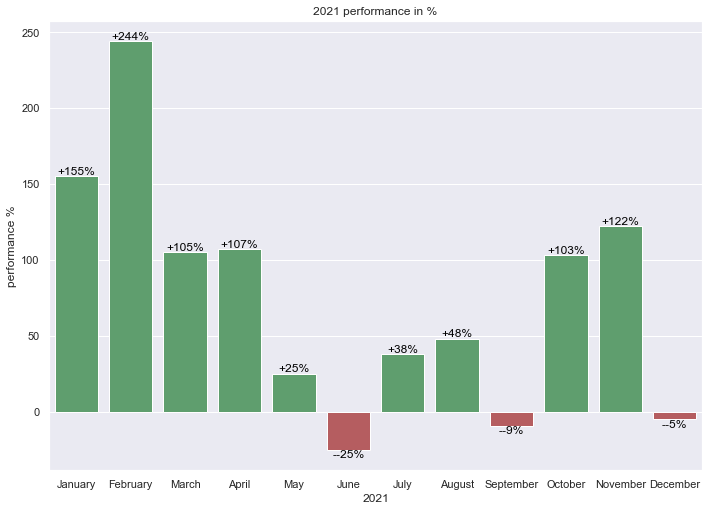

ValueError: Could not interpret input 'date'

In [7]:
BTobject.plot_bar_by_month(dfTrades=dfTrades)

/var/folders/p8/9tmcbqn10_l75b9_nsdx04lm0000gn/T/ipykernel_8780/3056460112.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  BTobject.plot_wallet_evolution(dfTrades=newDf['2021'])



----- Plot -----


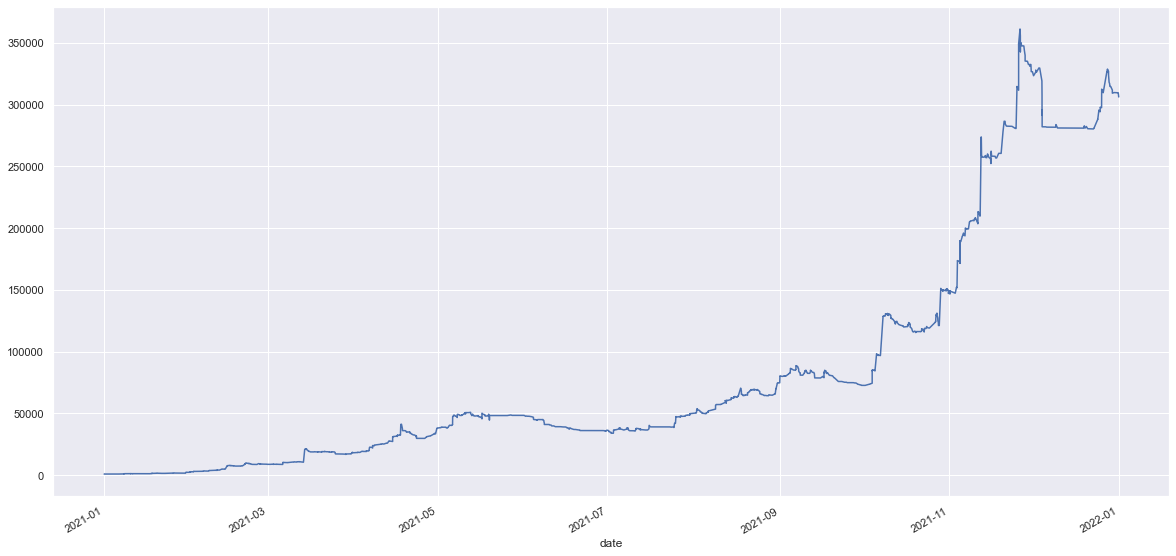

In [8]:
BTobject.plot_wallet_evolution(dfTrades=newDf['2021'])

In [9]:
dfTrades.iloc[-10:]

,date,symbol,position,reason,price,frais,fiat,coins,wallet
1906,2022-01-17 18:00:00,UNI/USD,Sell,Sell Market Order,16.647000,33.886866,98373.382617,0.000000,273925.576721
1907,2022-01-17 22:00:00,MATIC/USD,Sell,Sell Market Order,2.218089,37.638832,152105.503892,0.000000,269566.724390
1908,2022-01-18 06:00:00,LTC/USD,Sell,Sell Market Order,147.740000,40.623425,210098.344222,0.000000,269427.898949
1909,2022-01-18 06:00:00,TRX/USD,Sell,Sell Market Order,0.069462,40.439116,267828.070800,0.000000,267828.070800
1910,2022-01-18 07:00:00,UNI/USD,Buy,Buy Market Order,17.244000,37.495930,214232.459896,3105.898572,267790.574871
1911,2022-01-18 21:00:00,UNI/USD,Sell,Sell Market Order,16.110000,35.025218,264233.460672,0.000000,264233.460672
1912,2022-01-18 22:00:00,AAVE/USD,Buy,Buy Market Order,234.190000,36.992684,211357.174390,225.625747,264196.467987
1913,2022-01-19 11:00:00,AAVE/USD,Sell,Sell Market Order,217.400000,34.335726,260373.875976,0.000000,260373.875976
1914,2022-01-19 15:00:00,FTT/USD,Buy,Buy Market Order,46.101000,36.452343,208269.938906,1129.422024,260337.423633
1915,2022-01-20 11:00:00,TRX/USD,Buy,Buy Market Order,0.069735,36.447239,156175.118750,746517.142278,260300.976394
